'''
Question 6: Data Science Libraries + Files + Recursion + Sorting + Classes + Iterators
You are analyzing sensor data collected over time and stored in a .csv file named "sensor_readings.csv" with the following structure:


timestamp,temperature,humidity
2024-01-01 00:00,22.4,45
2024-01-01 01:00,23.1,47
2024-01-01 02:00,21.7,44
...


Tasks:
File & Pandas Integration:

Use pandas to read the file and store it in a DataFrame.

Write a function that raises a FileNotFoundError if the file does not exist (without using with).

Custom Iterator:

Create a class TemperatureIterator that:

Takes a pandas.Series of temperatures.

Implements the iterator protocol.

Only yields temperatures greater than the average (use numpy.mean for the average).

Recursion:

Write a recursive function count_above_threshold(data, threshold) that counts how many temperatures exceed a given threshold from a list.

Sorting:

Manually implement a merge sort to sort the humidity readings in descending order.

Explain why merge sort is more stable and consistently faster than quick sort on large data files.

Visualization:

Use matplotlib to plot two lines on the same graph: one for temperature and one for humidity over time.

Label axes and include a legend.

Design Reasoning:

Why is it better to separate the iteration logic from the data parsing logic into separate classes/modules?

Explain how this models polymorphism and separation of concerns in software design.



'''

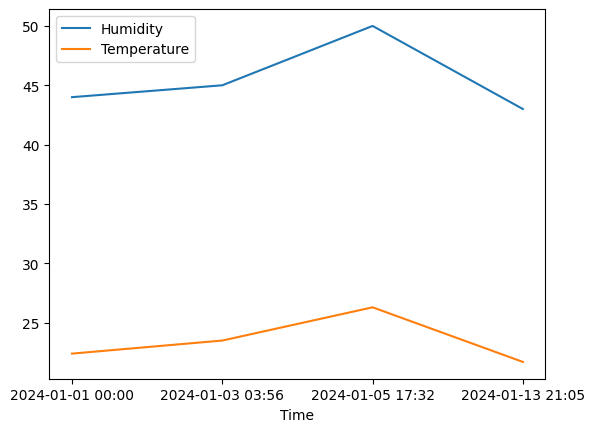

[50]
there are 2 humidity readings above the threshold
[43, 44, 45, 50]
44
45
50
43


In [6]:
from __future__ import annotations  

import numpy as np 

import matplotlib.pyplot as plt

import pandas as pd

temp_df = pd.DataFrame({
    'timestamp': ['2024-01-01 00:00', '2024-01-03 03:56', '2024-01-05 17:32', '2024-01-13 21:05'],
    'temperature': [22.4, 23.5, 26.3, 21.7],
    'humidity': [44, 45, 50, 43]
})

temp_df.to_csv('sensor_readings.csv', encoding = 'utf-8', index = False)

xpoints = temp_df['timestamp']
y1points = temp_df['humidity']
y2points = temp_df['temperature']

plt.plot(xpoints, y1points, label = 'Humidity')

plt.plot(xpoints, y2points, label = 'Temperature')

plt.xlabel('Time')

plt.legend()

plt.show()



class TemperatureIterable:

    def __init__(self, temp_df, section, start, end):
        self.temperatures = temp_df[section]
        self.start = start 
        self.end = end

    def __iter__(self):
        return TemperatureIterator(self.temperatures, self.start, self.end)
    
    def lstTemp(self):
        return [int(val) for val in self.temperatures[self.start: self.end + 1]]
    
    def _aboveAvgFilter(self, temperature):
        avg = np.mean(self.temperatures)
        if temperature > avg:
            return True 
        else:
            return False
    
    def aboveAvg(self):
        return list(map(int, filter(self._aboveAvgFilter, self)))

class TemperatureIterator:

    def __init__(self, temperatures, start, end):

        self.temperatures = temperatures
        self._index = start
        self._end = end

    def __iter__(self):
        return self
    
    def __next__(self):
        if self._index > self._end:
            raise StopIteration
        else:

            temp = self.temperatures[self._index]
            self._index += 1

        return temp


class SensorFilter:
    def __init__(self, temp_data: TemperatureIterable):
        self.temp_data = temp_data 

    def count_above_threshold(self, threshold: int, lst = None, index = 0, count = 0) -> int:
        if lst is None:
            lst = self.temp_data.lstTemp()

        if index >= len(lst):
            return count
        
        else:
            elem = lst[index]

            if elem > threshold:
                return self.count_above_threshold(threshold, lst, index + 1, count + 1)
            else:
                return self.count_above_threshold(threshold, lst, index + 1, count)
            

    def tempSort(self):

        lst = self.temp_data.lstTemp()

        return self._mergeSort(lst)
    

    def _mergeSort(self, lst):
        if len(lst) <= 1:
            return lst

        mid = len(lst) // 2

        left = lst[:mid]

        right = lst[mid:]

        sorted_left = self._mergeSort(left)

        sorted_right = self._mergeSort(right)

        return self._merge(sorted_left, sorted_right)
    

    def _merge(self, left, right):

        new_lst = []

        i = 0
        j = 0 

        while i < len(left) and j < len(right):
        
            if left[i] < right[j]:
                new_lst.append(left[i])
                i += 1
            else:
                new_lst.append(right[j])
                j += 1
        
        new_lst.extend(left[i:])
        new_lst.extend(right[j:])

        return new_lst
    

if __name__ == '__main__':

    sensor_data = TemperatureIterable(temp_df, 'humidity', 0, 3)

    print(sensor_data.aboveAvg())

    my_filter = SensorFilter(sensor_data)

    print(f'there are {my_filter.count_above_threshold(44)} humidity readings above the threshold')

    print(my_filter.tempSort())

    for temperature in sensor_data:
        print(temperature)

    # print(sensor_data.count_above_threshold(46))



In [17]:
# debugging question 3


import numpy as np 

import matplotlib as plt

import pandas as pd


df = pd.DataFrame({
    'Name': ['John', 'Maria', 'Bob'],
    'Score': [78, 84, 96]
})

df2 = df[df['Score'] > 80]

avg = df2['Score'].mean()

print(avg)

df.loc[df2.index, 'Score'] = 100

# df

# you can filter between two data frames using .loc and .index




90.0
